In [17]:

from osgeo import gdal 
import matplotlib.pyplot as plt 
  

dataset = gdal.Open(r'GBR_wind-speed_100m.tif')

In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os

# Define the URL
url = "https://data.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/60km"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage
soup = BeautifulSoup(response.text, "html.parser")

# Create a directory to save the downloaded files
if not os.path.exists("downloaded_files"):
    os.makedirs("downloaded_files")

# Find all file links that end with '.nc' (NetCDF files)
file_links = [link.get("href") for link in soup.find_all("a") if link.get("href").endswith(".nc")]

# Iterate through the file links and download the files
for file_link in file_links:
    file_url = f"{url}/{file_link}"
    file_name = os.path.join("downloaded_files", file_link)
    
    response = requests.get(file_url)
    
    with open(file_name, "wb") as file:
        file.write(response.content)

# Create a DataFrame with the downloaded file information
data = pd.DataFrame({
    "Filename": file_links,
    "File URL": [f"{url}/{file_link}" for file_link in file_links]
})

# Display the DataFrame
print(data)



Empty DataFrame
Columns: [Filename, File URL]
Index: []


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
wind_speed = pd.read_csv("uk 2019-01-01 to 2021-09-26.csv")

In [118]:
wind_speed.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,uk,2019-01-01,11.1,6.5,8.8,11.1,4.3,7.3,4.4,73.9,...,1.4,1,NaN,2019-01-01T08:06:15,2019-01-01T16:01:50,0.84,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,03680099999,D5621,03672099999,0378..."
1,uk,2019-01-02,6.6,5.1,5.8,5.2,3.1,4.0,0.5,68.8,...,1.6,1,NaN,2019-01-02T08:06:09,2019-01-02T16:02:54,0.88,Overcast,Cloudy skies throughout the day.,cloudy,"03769099999,03680099999,D5621,03672099999,0378..."
2,uk,2019-01-03,5.6,4.0,5.1,5.1,3.2,4.4,-0.7,66.3,...,1.3,1,NaN,2019-01-03T08:05:59,2019-01-03T16:04:00,0.91,Overcast,Cloudy skies throughout the day.,cloudy,"03769099999,03680099999,D5621,03660099999,0367..."
3,uk,2019-01-04,5.0,2.5,3.6,4.1,1.1,2.3,-1.4,69.8,...,2.4,2,NaN,2019-01-04T08:05:45,2019-01-04T16:05:09,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,03680099999,D5621,03672099999,0378..."
4,uk,2019-01-05,6.1,4.0,5.1,4.7,1.4,3.1,0.8,73.8,...,0.6,0,NaN,2019-01-05T08:05:29,2019-01-05T16:06:21,0.98,Overcast,Cloudy skies throughout the day.,cloudy,"03769099999,03680099999,D5621,03672099999,0378..."


In [120]:
wind_speed['datetime'] =pd.to_datetime(wind_speed['datetime'])
wind_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1000 non-null   object        
 1   datetime          1000 non-null   datetime64[ns]
 2   tempmax           1000 non-null   float64       
 3   tempmin           1000 non-null   float64       
 4   temp              1000 non-null   float64       
 5   feelslikemax      1000 non-null   float64       
 6   feelslikemin      1000 non-null   float64       
 7   feelslike         1000 non-null   float64       
 8   dew               1000 non-null   float64       
 9   humidity          1000 non-null   float64       
 10  precip            1000 non-null   float64       
 11  precipprob        1000 non-null   int64         
 12  precipcover       1000 non-null   float64       
 13  preciptype        583 non-null    object        
 14  snow              1000 no

In [122]:
wind_speed.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           417
snow                   0
snowdepth              0
windgust             497
windspeed              0
winddir                0
sealevelpressure       1
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          1000
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [42]:
wind_speed["Year"] = wind_speed['DATE'].dt.year
wind_speed["month"] = wind_speed['DATE'].dt.month
wind_speed["day"] = wind_speed['DATE'].dt.day

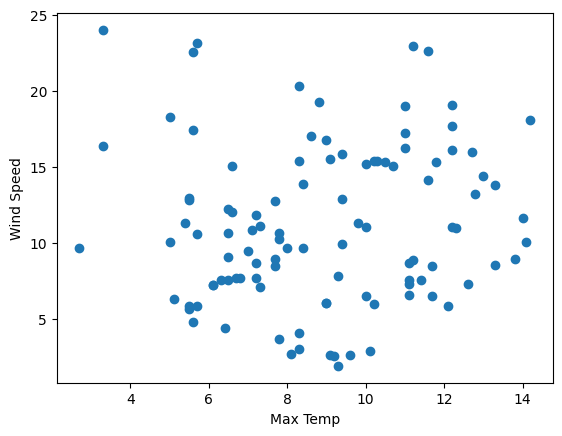

In [67]:
month = wind_speed["T.MAX"][1000:1200]
wind  = wind_speed['WIND'][1000:1200]
plt.xlabel('Max Temp')
plt.ylabel('Wind Speed')

# Create a bar chart with month names on the x-axis
plt.scatter(month, wind)

# You can rotate the x-axis labels for better readability (optional)


# Show the plot
plt.show()

In [104]:
import xarray as xr


# Open the NetCDF file using xarray
ds = xr.open_dataset('sfcWind_hadukgrid_uk_1km_ann-20y_198101-200012.nc')

# Convert the data to a pandas DataFrame
df = ds.to_dataframe()

# Optionally, you can reset the index if you prefer a simpler index
df.reset_index(inplace=True)

# Print the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a CSV file if needed
df.to_csv('wind_data_met.csv', index=False)

        time  projection_y_coordinate  projection_x_coordinate  bnds  sfcWind  \
0 1981-07-01                -199500.0                -199500.0     0      NaN   
1 1981-07-01                -199500.0                -199500.0     1      NaN   
2 1981-07-01                -199500.0                -198500.0     0      NaN   
3 1981-07-01                -199500.0                -198500.0     1      NaN   
4 1981-07-01                -199500.0                -197500.0     0      NaN   

   transverse_mercator  time_bnds  projection_y_coordinate_bnds  \
0          -2147483647 1981-01-01                     -200000.0   
1          -2147483647 2000-12-31                     -199000.0   
2          -2147483647 1981-01-01                     -200000.0   
3          -2147483647 2000-12-31                     -199000.0   
4          -2147483647 1981-01-01                     -200000.0   

   projection_x_coordinate_bnds   latitude  longitude  
0                     -200000.0  47.824377 -10.012910 

In [105]:
df['sfcWind'][100]

nan

In [106]:
print(df.tail())

              time  projection_y_coordinate  projection_x_coordinate  bnds  \
2609995 1981-07-01                1249500.0                 697500.0     1   
2609996 1981-07-01                1249500.0                 698500.0     0   
2609997 1981-07-01                1249500.0                 698500.0     1   
2609998 1981-07-01                1249500.0                 699500.0     0   
2609999 1981-07-01                1249500.0                 699500.0     1   

         sfcWind  transverse_mercator  time_bnds  \
2609995      NaN          -2147483647 2000-12-31   
2609996      NaN          -2147483647 1981-01-01   
2609997      NaN          -2147483647 2000-12-31   
2609998      NaN          -2147483647 1981-01-01   
2609999      NaN          -2147483647 2000-12-31   

         projection_y_coordinate_bnds  projection_x_coordinate_bnds  \
2609995                     1250000.0                      698000.0   
2609996                     1249000.0                      698000.0   
26099